# 1. Create a project structure
mkdir -p linear_regression_local/src <br>
cd linear_regression_local

## Create src/linreg_sklearn.py

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# a random number generator
rng  = np.random.default_rng(42)
X = rng.uniform(-3,3,size=(200, 1))
noise = rng.normal(0, 1.0, size=(200, 1))
y = 3 * X + 2 + noise

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [22]:
print(X_train.shape)
print(y_train.shape)
# coefficient 
print(model.coef_.ravel())
# intercept
print(model.intercept_.ravel())

print(mse)
print(r2)

(160, 1)
(160, 1)
[3.11385069]
[1.94989272]
1.0304597383789833
0.957364535946905


## Gradient Decent

In [23]:
def mse_loss(y_true, y_pred):
  return np.mean((y_true - y_pred) ** 2)

In [24]:
rng = np.random.default_rng(42)
X = rng.uniform(-3, 3, size=(200, 1))
noise = rng.normal(0, 1.0, size=(200, 1))
y = 3 * X + 2 + noise

X_mean, X_std = X.mean(axis=0, keepdims=True), X.std(axis=0, keepdims=True)
Xn = (X - X_mean) / (X_std - 1e-8)

N, d = Xn.shape
w = np.zeros((d, 1))
b = np.zeros((1, 1))

lr = 0.1
steps = 1000

In [26]:
for t in range(steps):
  y_pred = Xn @ w + b

  loss = mse_loss(y, y_pred)

  grad_w = (2.0 / N) * (Xn.T @ (y_pred - y))
  grad_b = (2.0 / N) * np.sum((y_pred - y), axis=0, keepdims=True)

  w -= lr * grad_w
  b -= lr * grad_b

  if (t + 1) % 200 == 0:
            print(f"step {t+1:4d} | loss {loss:.4f} | w {w.ravel()} | b {b.ravel()}")

  w_raw = w / (X_std + 1e-8)
  b_raw = b - (X_mean @ w_raw)

step  200 | loss 0.9958 | w [5.25452508] | b [1.9060567]
step  400 | loss 0.9958 | w [5.25452508] | b [1.9060567]
step  600 | loss 0.9958 | w [5.25452508] | b [1.9060567]
step  800 | loss 0.9958 | w [5.25452508] | b [1.9060567]
step 1000 | loss 0.9958 | w [5.25452508] | b [1.9060567]


In [29]:
print(w_raw)
print(b_raw)

[[3.10986816]]
[[2.02044596]]


## Polynomial regression

In [39]:
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [43]:
def eval_model(model, X_train, X_test, y_train, y_test, name):
  model.fit(X_train, y_train)
  pred_tr = model.predict(X_train)
  pred_te = model.predict(X_test)

  mse_tr = mean_squared_error(y_train, pred_tr)
  mse_te = mean_squared_error(y_test, pred_te)

  r2_tr = r2_score(y_train, pred_tr)
  r2_te = r2_score(y_test, pred_te)

  print(name)
  print("Train MSE:", mse_tr)
  print("Test MSE:", mse_te)
  print("Train R2:", r2_tr)
  print("Test R2:", r2_te)

  return model

In this regression, the standard deviation of noise is set 0.25. <br>
This is because, the height of sin is 2. If set 1.0, the data will fluctuate。

Poly degree=3
Train MSE: 0.043927214369816246
Test MSE: 0.08614864348749265
Train R2: 0.9277673337534498
Test R2: 0.8898592439171822
Poly degree=15
Train MSE: 0.033696105787441866
Test MSE: 0.10922146302140819
Train R2: 0.9445910787180444
Test R2: 0.860360720370531


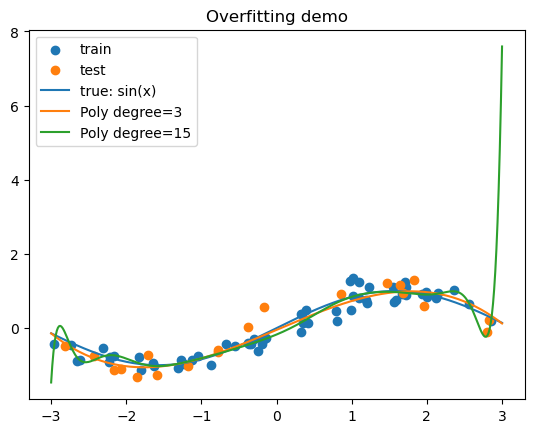

In [49]:
rng = np.random.default_rng(42)

N = 80
X = rng.uniform(-3, 3, size=(N, 1))
y_true = np.sin(X)
y = y_true + rng.normal(0, 0.25, size=(N, 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

deg_low = 3
deg_high = 15

model_low = Pipeline([
  ("poly", PolynomialFeatures(degree=deg_low, include_bias=False)),
  ("lin", LinearRegression())
])

model_high = Pipeline([
  ("poly", PolynomialFeatures(degree=deg_high, include_bias=False)),
  ("lin", LinearRegression())
])

model_low = eval_model(model_low, X_train, X_test, y_train, y_test, f"Poly degree={deg_low}")
model_high = eval_model(model_high, X_train, X_test, y_train, y_test, f"Poly degree={deg_high}")

xs = np.linspace(-3, 3, 400).reshape(-1, 1)
plt.figure()
plt.scatter(X_train, y_train, label="train")
plt.scatter(X_test, y_test, label="test")
plt.plot(xs, np.sin(xs), label="true: sin(x)")
plt.plot(xs, model_low.predict(xs), label=f"Poly degree={deg_low}")
plt.plot(xs, model_high.predict(xs), label=f"Poly degree={deg_high}")
plt.legend()
plt.title("Overfitting demo")
plt.show()